# Auto MPG Study

In [48]:
#import all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import statistics
from scipy import stats 
import warnings
warnings.filterwarnings("ignore")

In [49]:
# load the dataset
df = pd.read_csv('auto-mpg.csv')

In [50]:
# view the data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
#shape of the data
df.shape

(398, 9)

In [52]:
# examine the data types
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [53]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [54]:
df.duplicated().sum()

0

Horsepower is an object which is wrong , we should convert to float

In [56]:
# convert horsepower to float data type
df['horsepower'] = df['horsepower'].astype(float)

ValueError: could not convert string to float: '?'

This doesnt succeed ! Why ? 

In [58]:
# we have to replace the ? with a null value
df['horsepower'] = df['horsepower'].replace('?', np.nan)


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [59]:
# change data type top foat
df['horsepower']=df['horsepower'].astype('float')

In [ ]:
# check the data types again
df.dtypes

In [61]:
# check the null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Horsepower has 6 null values . We will impute these nulls with c olumn median

In [64]:
df['horsepower']=df['horsepower'].replace(np.nan, df['horsepower'].median())

In [65]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**Observations**
1. The dataset has 357 rows and 9 columns
2. Horsepower was having object datatype which we have changed to float
3. We have imputed the nulls with column medians


In [68]:
# get the descriptive statistics for numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Descriptive statistics for column '{col}':")
    print(df[col].describe())
    print()

Descriptive statistics for column 'mpg':
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Descriptive statistics for column 'cylinders':
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

Descriptive statistics for column 'displacement':
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

Descriptive statistics for column 'horsepower':
count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

Descriptive statistics for column 'weight':


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [70]:
# get  descriptives for Categorical columns
df.describe(include='O').T

,count,unique,top,freq
car name,398,305,ford pinto,6


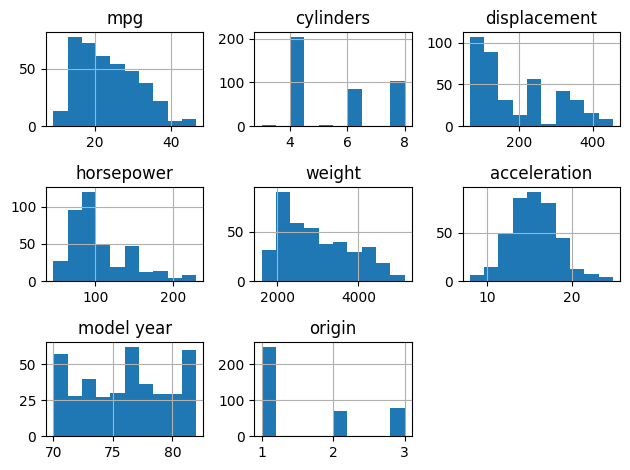

In [71]:
# histograms to view distributions
df.hist()
plt.tight_layout()
plt.show()


In [73]:
# check the skewness
for col in df.select_dtypes(exclude='O').columns:
    print(col, df[col].skew())


mpg 0.45706634399491913
cylinders 0.5269215453528939
displacement 0.7196451643005952
horsepower 1.0955524807071189
weight 0.5310625125994629
acceleration 0.27877684462588986
model year 0.01153459401509278
origin 0.9237762994760227


In [74]:
# check the column kurtosis
for col in df.select_dtypes(exclude='O').columns:
    print(col, df[col].kurt())

mpg -0.5107812652123154
cylinders -1.376662176054571
displacement -0.7465966295967594
horsepower 0.75350909665665
weight -0.7855289051011454
acceleration 0.4194968829706842
model year -1.1812317432191861
origin -0.8175968230863417


- Accelation and weight looks normally distributed 
- mpg, cylinders, displacement, weight, model year and origin are platykurtic
- horsepower is leptokurtic and acceleration is mildly leptokurtic

**Bivariate Relationships**

In [88]:
# Covariance Matrix
covariance_matrix = df.select_dtypes(exclude='O').cov()
print(covariance_matrix)

                      mpg    cylinders  displacement    horsepower  \
mpg             61.089611   -10.308911   -655.402318   -230.323549   
cylinders      -10.308911     2.893415    168.623214     54.511746   
displacement  -655.402318   168.623214  10872.199152   3559.413587   
horsepower    -230.323549    54.511746   3559.413587   1459.177916   
weight       -5505.211745  1290.695575  82368.423240  27838.432016   
acceleration     9.058930    -2.370842   -156.332976    -72.080867   
model year      16.741163    -2.193499   -142.717137    -58.144194   
origin           3.532185    -0.767477    -50.964989    -13.899450   

                     weight  acceleration  model year      origin  
mpg            -5505.211745      9.058930   16.741163    3.532185  
cylinders       1290.695575     -2.370842   -2.193499   -0.767477  
displacement   82368.423240   -156.332976 -142.717137  -50.964989  
horsepower     27838.432016    -72.080867  -58.144194  -13.899450  
weight        717140.990526  

- cylinder, displacement, horsepower and weight have neagtive covarince with mpg
- acceleration and model year have positive covarince with mpg

In [87]:
# get the correlation matrix
correlation_matrix = df.select_dtypes(exclude='O').corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.453669 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.684259   -0.411651 -0.453669  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

<Axes: >

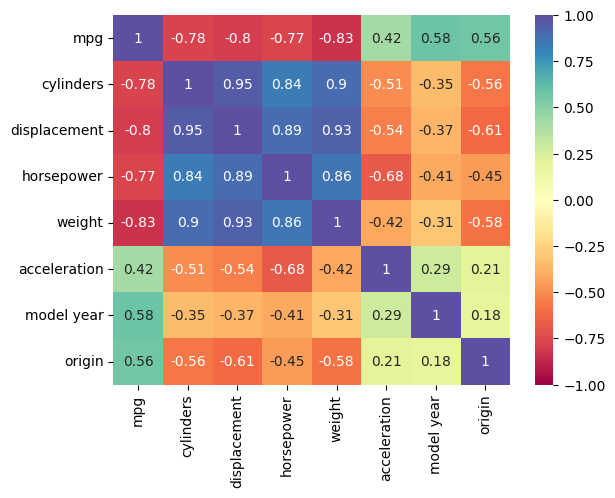

In [90]:
# create a correlation heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='Spectral',vmin=-1,vmax=+1)

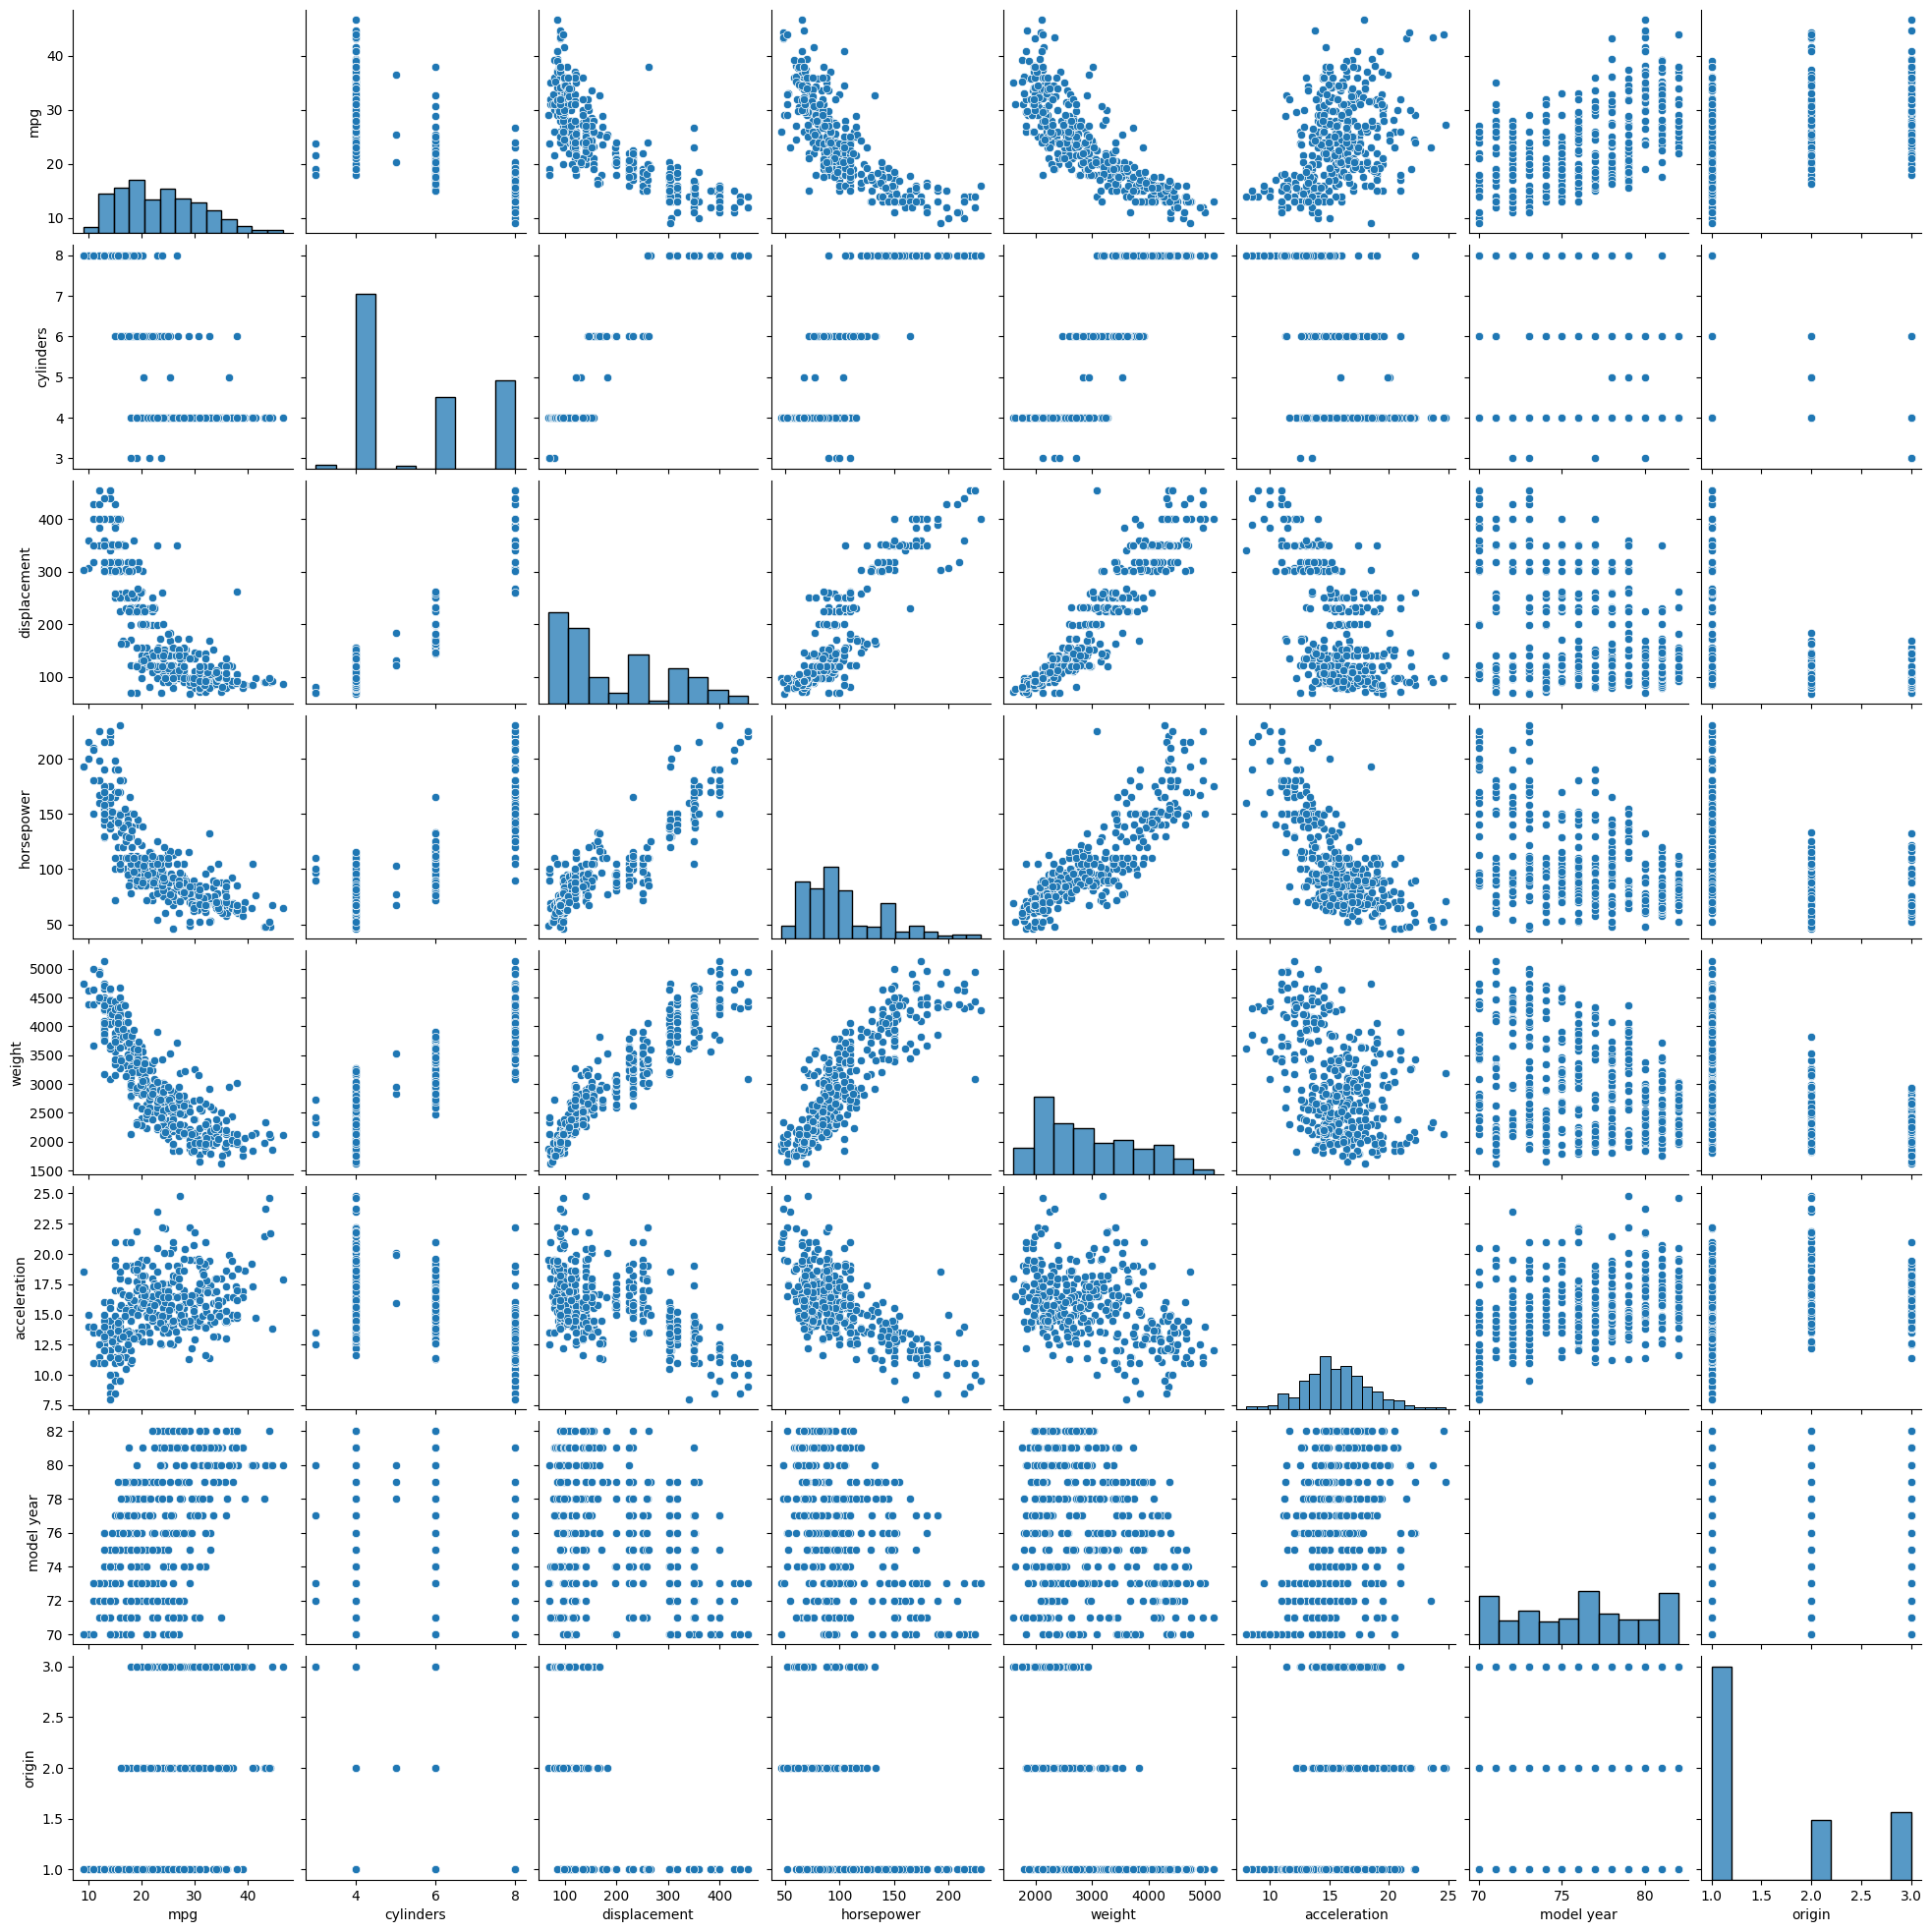

In [91]:
# create the bivariate scatterplots
sns.pairplot(df)

The correlation heatmap and pairplot shows that:
- cylinders , horsepower, weight and displacement have strong negative correlation with mpgm
- there exist strong multicollinearity between displacemnt and cylinders, displacemnent and hoprsepower, displacement and weight, horsepower and weight

# THE END